In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet
from sklearn.ensemble import VotingRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [226]:
s_habits = pd.read_csv(r'C:\Users\USER\Desktop\Rahima Sumani\OQD\OQD_DATASET\student_habits_performance.csv')
s_habits.head(10)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
5,S1005,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,1,Master,Average,4,No,100.0
6,S1006,21,Female,5.6,1.5,1.4,Yes,85.8,6.5,Good,2,Master,Poor,4,No,89.8
7,S1007,21,Female,4.3,1.0,2.0,Yes,77.7,4.6,Fair,0,Bachelor,Average,8,No,72.6
8,S1008,23,Female,4.4,2.2,1.7,No,100.0,7.1,Good,3,Bachelor,Good,1,No,78.9
9,S1009,18,Female,4.8,3.1,1.3,No,95.4,7.5,Good,5,Bachelor,Good,10,Yes,100.0


In [227]:
s_habits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [228]:
s_habits.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [229]:
s_habits.shape

(1000, 16)

In [230]:
s_habits.size

16000

In [231]:
s_habits['parental_education_level'].describe()

count             909
unique              3
top       High School
freq              392
Name: parental_education_level, dtype: object

In [232]:
s_habits['parental_education_level'] = s_habits['parental_education_level'].fillna('High School')
s_habits['parental_education_level']

0           Master
1      High School
2      High School
3           Master
4           Master
          ...     
995    High School
996    High School
997       Bachelor
998       Bachelor
999       Bachelor
Name: parental_education_level, Length: 1000, dtype: object

In [233]:
s_habits['parental_education_level'].isnull().sum()

0

In [234]:
s_habits['exam_score'].max()

100.0

In [235]:
def exam_performance(grade):
    if 0 < grade <=20:
        return 'E'
    if 20 < grade <=40:
        return 'D'
    if 40 < grade <=60:
        return 'C'
    if 60 < grade <=80:
        return 'B'
    if 80 < grade <=100:
        return 'A'

In [236]:
s_habits['student performance'] = s_habits['exam_score'].apply(exam_performance)
s_habits['student performance'].head(10) 

0    C
1    A
2    D
3    D
4    B
5    A
6    A
7    B
8    B
9    A
Name: student performance, dtype: object

In [237]:
s_habits.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [238]:
s_habits.describe(include ='O')

,student_id,gender,part_time_job,diet_quality,parental_education_level,internet_quality,extracurricular_participation,student performance
count,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,2,3,3,3,2,5
top,S1000,Female,No,Fair,High School,Good,No,B
freq,1,481,785,437,483,447,682,442


### Correlation Between Study Hours and Exam Score

In [240]:
#s_habits.groupby(['study_hours_per_day'], as_index = False)['exam_score'].count().sort_values(by = 'exam_score', ascending = False ).head(10)

<Axes: xlabel='study_hours_per_day', ylabel='exam_score'>

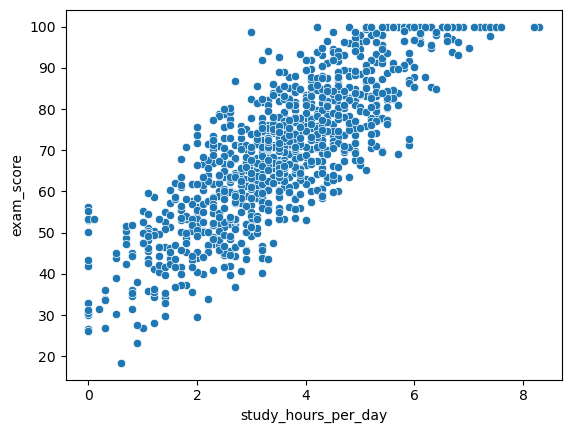

In [241]:
sns.scatterplot(y = 'exam_score', x = 'study_hours_per_day', data = s_habits )

In [242]:
exam_vrs_study = s_habits.groupby(['exam_score'], as_index = False)['study_hours_per_day'].sum().sort_values(by = 'study_hours_per_day', ascending = False ).head(10)
exam_vrs_study 

,exam_score,study_hours_per_day
479,100.0,299.3
353,80.9,31.9
293,74.0,27.0
261,70.7,25.6
307,75.4,24.7
462,96.6,23.3
214,65.6,23.0
411,88.0,22.0
264,71.0,21.9
329,77.9,21.2


<Axes: xlabel='exam_score', ylabel='study_hours_per_day'>

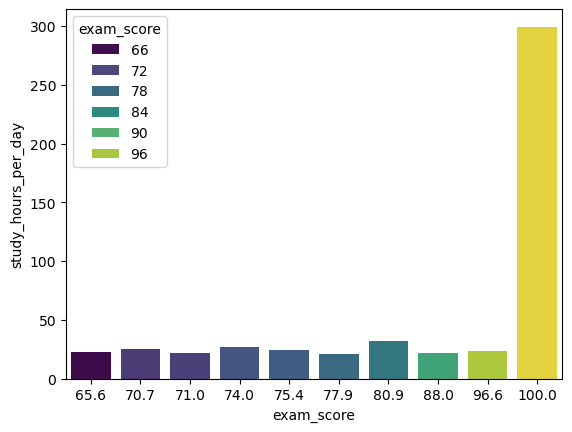

In [243]:
sns.barplot(data = exam_vrs_study, x = 'exam_score', y = 'study_hours_per_day', hue = 'exam_score' , palette ='viridis' ) 

### Impact of Social Media Usage on Exam Performance

In [245]:
exam_vrs_social_media = s_habits.groupby(['exam_score'], as_index = False)['social_media_hours'].sum().sort_values(by = 'social_media_hours', ascending = False ).head(10)
exam_vrs_social_media

,exam_score,social_media_hours
479,100.0,108.2
293,74.0,27.3
264,71.0,19.3
307,75.4,16.5
214,65.6,16.2
177,61.5,15.9
115,53.4,15.8
94,50.1,15.0
353,80.9,14.6
263,70.9,14.5


<Axes: xlabel='exam_score', ylabel='social_media_hours'>

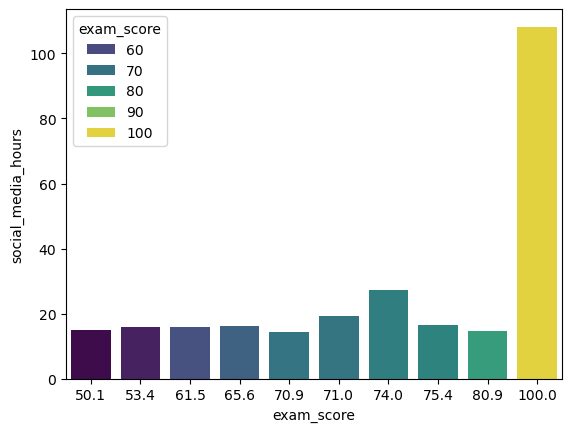

In [246]:
sns.barplot(data = exam_vrs_social_media, x = 'exam_score', y = 'social_media_hours', hue = 'exam_score' , palette ='viridis' ) 

In [247]:
#s_habits.groupby(['xam_score'], as_index = False)['exam_score'].count().sort_values(by = 'exam_score', ascending = False ).head(10)

In [248]:
#sns.scatterplot(y = 'exam_score', x = 'sleep_hours', data = s_habits )

### Effect of Sleep Hours on Mental Health 

In [250]:
sleep_vrs_mental = s_habits.groupby(['mental_health_rating'], as_index = False)['sleep_hours'].sum().sort_values(by = 'sleep_hours', ascending = False ).head(10)
sleep_vrs_mental

,mental_health_rating,sleep_hours
3,4,712.9
5,6,702.9
0,1,665.3
2,3,662.2
7,8,662.0
9,10,644.2
4,5,635.5
1,2,624.6
6,7,584.2
8,9,576.3


<Axes: xlabel='mental_health_rating', ylabel='sleep_hours'>

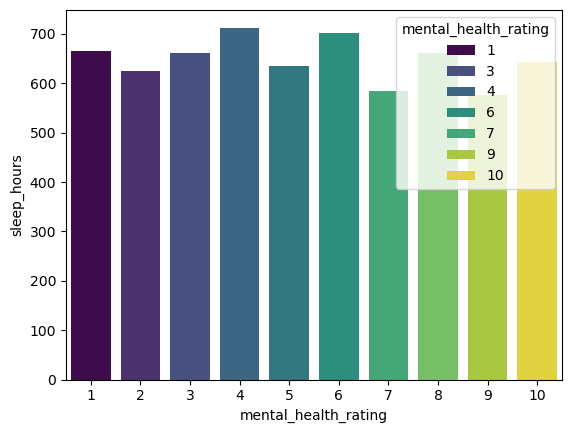

In [251]:
sns.barplot( data = sleep_vrs_mental , x = 'mental_health_rating', y = 'sleep_hours', hue = 'mental_health_rating' , palette ='viridis' ) 


### Effect of Sleep Hours on  Exam Scores

In [253]:
sleep_vrs_exam = s_habits.groupby(['exam_score'], as_index = False)['sleep_hours'].sum().sort_values(by = 'sleep_hours', ascending = False ).head(10)
sleep_vrs_exam 

,exam_score,sleep_hours
479,100.0,328.8
261,70.7,49.2
293,74.0,47.9
214,65.6,47.3
307,75.4,41.8
353,80.9,41.6
314,76.1,41.1
411,88.0,39.9
264,71.0,38.2
283,73.0,36.0


<Axes: xlabel='exam_score', ylabel='sleep_hours'>

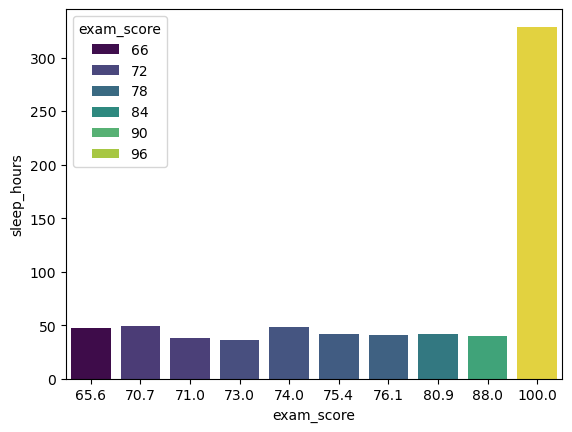

In [254]:
sns.barplot( data = sleep_vrs_exam , x = 'exam_score', y = 'sleep_hours', hue = 'exam_score' , palette ='viridis' ) 

In [255]:
#s_habits.groupby(['student performance'], as_index = False)['sleep_hours'].sum().sort_values(by = 'sleep_hours', ascending = False ).head(10)

In [256]:
s_habits.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score',
       'student performance'],
      dtype='object')

### Gender-Based Performance Differences

In [258]:
gender_vrs_exam = s_habits.groupby(['gender'], as_index = False)['exam_score'].sum().sort_values(by = 'exam_score', ascending = False ).head(10)
gender_vrs_exam


,gender,exam_score
0,Female,33545.6
1,Male,33088.7
2,Other,2967.2


<Axes: xlabel='gender', ylabel='exam_score'>

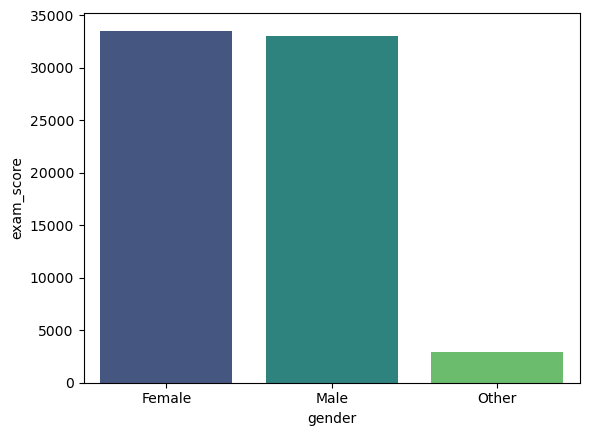

In [259]:
sns.barplot( data = gender_vrs_exam, x = 'gender', y = 'exam_score', hue = 'gender' , palette ='viridis' ) 

### Extracurricular Participation and Its Effects

In [261]:
exam_vrs_extra_c = s_habits.groupby(['exam_score'], as_index = False)['extracurricular_participation'].count().sort_values(by = 'extracurricular_participation', ascending = False ).head(10)
exam_vrs_extra_c

,exam_score,extracurricular_participation
479,100.0,48
293,74.0,7
214,65.6,7
261,70.7,7
353,80.9,7
263,70.9,6
264,71.0,6
314,76.1,6
307,75.4,6
115,53.4,5


<Axes: xlabel='exam_score', ylabel='extracurricular_participation'>

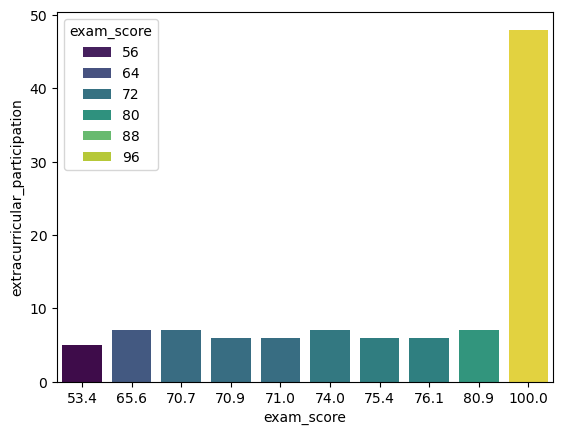

In [262]:
sns.barplot(data = exam_vrs_extra_c, x = 'exam_score', y = 'extracurricular_participation', hue = 'exam_score' , palette ='viridis' ) 

### Relationship Between Attendance and Exam Scores

In [264]:
exam_vrs_attendance = s_habits.groupby(['exam_score'], as_index = False)['attendance_percentage'].sum().sort_values(by = 'attendance_percentage', ascending = False ).head(10)
exam_vrs_attendance 


,exam_score,attendance_percentage
479,100.0,4164.4
353,80.9,608.5
214,65.6,594.4
293,74.0,583.9
261,70.7,572.5
263,70.9,549.3
307,75.4,535.3
314,76.1,528.0
264,71.0,503.6
196,63.6,448.5


<Axes: xlabel='exam_score', ylabel='attendance_percentage'>

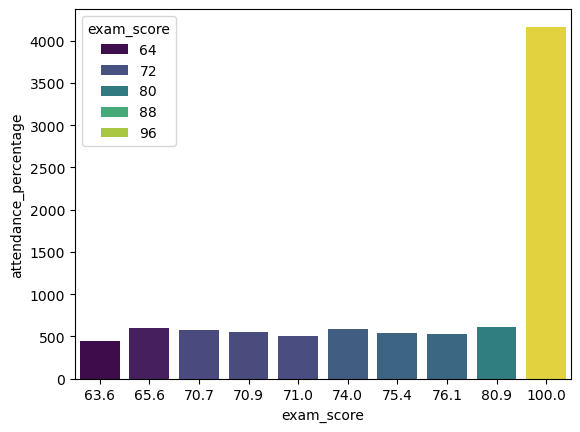

In [265]:
sns.barplot(data = exam_vrs_attendance, x = 'exam_score', y = 'attendance_percentage', hue = 'exam_score' , palette ='viridis' ) 

In [266]:
s_habits.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score',
       'student performance'],
      dtype='object')

In [267]:
 cat_cols = s_habits.select_dtypes(include = 'O').columns.tolist()
 cat_cols

['student_id',
 'gender',
 'part_time_job',
 'diet_quality',
 'parental_education_level',
 'internet_quality',
 'extracurricular_participation',
 'student performance']

In [268]:
num_cols = s_habits.select_dtypes(include = 'number').columns.tolist()
num_cols

['age',
 'study_hours_per_day',
 'social_media_hours',
 'netflix_hours',
 'attendance_percentage',
 'sleep_hours',
 'exercise_frequency',
 'mental_health_rating',
 'exam_score']

In [269]:
s_habits.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,student performance
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,C
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0,A
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,D
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,D
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4,B


 ## Train 5 models and allow those models to make prediction based on the target column(Exam score)

In [270]:
X = s_habits[['student_id', 'age', 'gender', 'study_hours_per_day','social_media_hours', 'netflix_hours', 'part_time_job','attendance_percentage', 'sleep_hours', 'diet_quality','exercise_frequency', 'parental_education_level', 'internet_quality','mental_health_rating', 'extracurricular_participation','student performance']]

In [271]:
y = s_habits['exam_score']

In [272]:
X_train,X_test,y_train, y_test = train_test_split(X,y, random_state = 50, test_size = 0.2)

In [273]:
X_train.select_dtypes(include = 'O').columns.tolist()


['student_id',
 'gender',
 'part_time_job',
 'diet_quality',
 'parental_education_level',
 'internet_quality',
 'extracurricular_participation',
 'student performance']

In [274]:
cat_features = ['student_id',
 'gender',
 'part_time_job',
 'diet_quality',
 'parental_education_level',
 'internet_quality',
 'extracurricular_participation',
 'student performance']

In [275]:
X_train.select_dtypes(include = 'number').columns.tolist()


['age',
 'study_hours_per_day',
 'social_media_hours',
 'netflix_hours',
 'attendance_percentage',
 'sleep_hours',
 'exercise_frequency',
 'mental_health_rating']

In [276]:
num_features = ['age',
 'study_hours_per_day',
 'social_media_hours',
 'netflix_hours',
 'attendance_percentage',
 'sleep_hours',
 'exercise_frequency','mental_health_rating']

In [277]:
one_hot = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')
scaler = StandardScaler()

In [278]:
preprocessor = ColumnTransformer(transformers =[
    ('cat',Pipeline(steps = [
      ('one_hot', one_hot) 
    ]),cat_features),
    ('num',Pipeline(steps = [
        ('scaler', scaler)
    ]),num_features)
    
])
preprocessor

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('one_hot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['student_id', 'gender', 'part_time_job',
                                  'diet_quality', 'parental_education_level',
                                  'internet_quality',
                                  'extracurricular_participation',
                                  'student performance']),
                                ('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['age', 'study_hours_per_day',
                                  'social_media_hours', 'netflix_hours',
                                  'attendance_percentage', 'sleep_hours',
                                  'exercise_frequency',
                                  'mental_health_rating'])])

In [279]:
preprocessor.fit_transform(X_train,X_test)

array([[ 0.        ,  0.        ,  0.        , ..., -0.83402758,
         0.45960444, -1.2114488 ],
       [ 0.        ,  0.        ,  0.        , ..., -0.58306642,
        -0.03129483,  0.19670091],
       [ 0.        ,  0.        ,  0.        , ..., -1.08498874,
        -1.01309337, -0.50737394],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.83402758,
        -1.01309337, -0.85941137],
       [ 0.        ,  0.        ,  0.        , ..., -1.25229617,
         0.95050371, -1.56348622],
       [ 0.        ,  0.        ,  0.        , ..., -0.66672014,
         1.44140298,  0.54873834]])

In [280]:
pipeline_dt = Pipeline([
    ('preprocessor',preprocessor),
    ('model', DecisionTreeRegressor())
])
pipeline_dt

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['student_id', 'gender',
                                                   'part_time_job',
                                                   'diet_quality',
                                                   'parental_education_level',
                                                   'internet_quality',
                                                   'extracurricular_participation',
                                                   'student performance']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'study_hours_per_day',
                                                   'social_media_hours',
                                                   'netflix_hours',
                                                   'attendance_percentage',
                                                   'sleep_hours',
                                                   'exercise_frequency',
                                                   'mental_health_rating'])])),
                ('model', DecisionTreeRegressor())])

In [281]:
pipeline_dt.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['student_id', 'gender',
                                                   'part_time_job',
                                                   'diet_quality',
                                                   'parental_education_level',
                                                   'internet_quality',
                                                   'extracurricular_participation',
                                                   'student performance']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'study_hours_per_day',
                                                   'social_media_hours',
                                                   'netflix_hours',
                                                   'attendance_percentage',
                                                   'sleep_hours',
                                                   'exercise_frequency',
                                                   'mental_health_rating'])])),
                ('model', DecisionTreeRegressor())])

In [282]:
DecisionTreeRegressor().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [283]:
y_pred_dt = pipeline_dt.predict(X_test)

In [284]:
print(r2_score(y_pred_dt,y_test))

0.8761542590303667


In [285]:
elastic_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', ElasticNet(l1_ratio = 0.5, max_iter = 3000))
                       ])
elastic_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['student_id', 'gender',
                                                   'part_time_job',
                                                   'diet_quality',
                                                   'parental_education_level',
                                                   'internet_quality',
                                                   'extracurricular_participation',
                                                   'student performance']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'study_hours_per_day',
                                                   'social_media_hours',
                                                   'netflix_hours',
                                                   'attendance_percentage',
                                                   'sleep_hours',
                                                   'exercise_frequency',
                                                   'mental_health_rating'])])),
                ('model', ElasticNet(max_iter=3000))])

In [286]:
elastic_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['student_id', 'gender',
                                                   'part_time_job',
                                                   'diet_quality',
                                                   'parental_education_level',
                                                   'internet_quality',
                                                   'extracurricular_participation',
                                                   'student performance']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'study_hours_per_day',
                                                   'social_media_hours',
                                                   'netflix_hours',
                                                   'attendance_percentage',
                                                   'sleep_hours',
                                                   'exercise_frequency',
                                                   'mental_health_rating'])])),
                ('model', ElasticNet(max_iter=3000))])

In [287]:
y_pred_epipeline = elastic_pipeline.predict(X_test)

In [288]:
print(r2_score(y_pred_epipeline,y_test))

0.5310608955497126


In [289]:
ElasticNet().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [290]:
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())
                       ])
pipeline_rf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['student_id', 'gender',
                                                   'part_time_job',
                                                   'diet_quality',
                                                   'parental_education_level',
                                                   'internet_quality',
                                                   'extracurricular_participation',
                                                   'student performance']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'study_hours_per_day',
                                                   'social_media_hours',
                                                   'netflix_hours',
                                                   'attendance_percentage',
                                                   'sleep_hours',
                                                   'exercise_frequency',
                                                   'mental_health_rating'])])),
                ('model', RandomForestRegressor())])

In [291]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [292]:
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['student_id', 'gender',
                                                   'part_time_job',
                                                   'diet_quality',
                                                   'parental_education_level',
                                                   'internet_quality',
                                                   'extracurricular_participation',
                                                   'student performance']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'study_hours_per_day',
                                                   'social_media_hours',
                                                   'netflix_hours',
                                                   'attendance_percentage',
                                                   'sleep_hours',
                                                   'exercise_frequency',
                                                   'mental_health_rating'])])),
                ('model', RandomForestRegressor())])

In [293]:
y_pred_rf = pipeline_rf.predict(X_test)

In [294]:
print(r2_score(y_pred_rf,y_test))

0.9227719047056236


In [295]:
lin_rgr = LinearRegression()
rf_rgr = RandomForestRegressor(min_samples_split = 3)
dt_rgr = DecisionTreeRegressor(min_samples_split = 2)
svm_rgr = SVR()

In [296]:
voting_rgr = VotingRegressor(estimators =[ 
                             ('log', lin_rgr),
                              ('rf',rf_rgr ),
                              ('dt',dt_rgr),
                              ('svm',svm_rgr)
])

In [297]:
vt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', VotingRegressor(estimators =[ 
                             ('lin', lin_rgr),
                              ('rf',rf_rgr ),
                              ('dt',dt_rgr),
                              ('svm',svm_rgr)
]))
                       ])
vt_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['student_id', 'gender',
                                                   'part_time_job',
                                                   'diet_quality',
                                                   'parental_education_level',
                                                   'internet_quality',
                                                   'extracurricular_participation',
                                                   'student performance']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'study_hours_per_day',
                                                   'social_media_hours',
                                                   'netflix_hours',
                                                   'attendance_percentage',
                                                   'sleep_hours',
                                                   'exercise_frequency',
                                                   'mental_health_rating'])])),
                ('model',
                 VotingRegressor(estimators=[('lin', LinearRegression()),
                                             ('rf',
                                              RandomForestRegressor(min_samples_split=3)),
                                             ('dt', DecisionTreeRegressor()),
                                             ('svm', SVR())]))])

In [298]:
vt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['student_id', 'gender',
                                                   'part_time_job',
                                                   'diet_quality',
                                                   'parental_education_level',
                                                   'internet_quality',
                                                   'extracurricular_participation',
                                                   'student performance']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'study_hours_per_day',
                                                   'social_media_hours',
                                                   'netflix_hours',
                                                   'attendance_percentage',
                                                   'sleep_hours',
                                                   'exercise_frequency',
                                                   'mental_health_rating'])])),
                ('model',
                 VotingRegressor(estimators=[('lin', LinearRegression()),
                                             ('rf',
                                              RandomForestRegressor(min_samples_split=3)),
                                             ('dt', DecisionTreeRegressor()),
                                             ('svm', SVR())]))])

In [299]:
y_pred_vt = vt_pipeline.predict(X_test)

In [300]:
print(r2_score(y_pred_vt,y_test))

0.9287365403419942


In [301]:
pipeline_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
                       ])
pipeline_lr

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['student_id', 'gender',
                                                   'part_time_job',
                                                   'diet_quality',
                                                   'parental_education_level',
                                                   'internet_quality',
                                                   'extracurricular_participation',
                                                   'student performance']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'study_hours_per_day',
                                                   'social_media_hours',
                                                   'netflix_hours',
                                                   'attendance_percentage',
                                                   'sleep_hours',
                                                   'exercise_frequency',
                                                   'mental_health_rating'])])),
                ('model', LinearRegression())])

In [302]:
pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['student_id', 'gender',
                                                   'part_time_job',
                                                   'diet_quality',
                                                   'parental_education_level',
                                                   'internet_quality',
                                                   'extracurricular_participation',
                                                   'student performance']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'study_hours_per_day',
                                                   'social_media_hours',
                                                   'netflix_hours',
                                                   'attendance_percentage',
                                                   'sleep_hours',
                                                   'exercise_frequency',
                                                   'mental_health_rating'])])),
                ('model', LinearRegression())])

In [303]:
y_pred_lr = pipeline_lr.predict(X_test)

In [304]:
print(r2_score(y_pred_vt,y_test))

0.9287365403419942
